<h1>LeBron VS Jordan (Regular Season)</h1>

In [123]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

LeBron = pd.read_csv('lebron_career.csv')
Jordan = pd.read_csv('jordan_career.csv')


In [124]:
Jordan = Jordan.drop(["game", "date", "team","minus_plus","game_score", "age"], axis = 1)
LeBron = LeBron.drop(["game", "date", "team","minus_plus","game_score", "age"], axis = 1)

In [125]:
fgp_Jordan = Jordan.fg.sum() / Jordan.fga.sum()
tpp_Jordan = Jordan.three.sum() / Jordan.threeatt.sum()

fgp_LeBron = LeBron.fg.sum() / LeBron.fga.sum()
tpp_LeBron = LeBron.three.sum() / LeBron.threeatt.sum()

fgp = [fgp_Jordan*100,fgp_LeBron*100]
tpp = [tpp_Jordan*100,tpp_LeBron*100]

In [126]:
Jordan_means = Jordan[["pts","ast","trb","blk","stl"]].mean()
LeBron_means = LeBron[["pts","ast","trb","blk","stl"]].mean()
df1 = pd.DataFrame(LeBron_means.transpose())
df2 = pd.DataFrame(Jordan_means.transpose())

combined_means = {"Jordan": Jordan_means, "LeBron" : LeBron_means}
mean_df = pd.DataFrame(combined_means)

mean_df.index.name = 'Averages'
mean_df = mean_df.transpose()

mean_df["fgPercent"] = fgp
mean_df["3ptPercent"] = tpp

# mean_df["fgPercent"] = fgp_Jordan
# mean_df["3ptPercent"] = tpp_Jordan

# mean_df.index.name = 'Averages'
# mean_df = mean_df.transpose()
mean_df

Averages,pts,ast,trb,blk,stl,fgPercent,3ptPercent
Jordan,30.123134,5.254664,6.223881,0.833022,2.345149,49.688226,32.677165
LeBron,27.148410,7.163428,7.349823,0.782686,1.640459,50.376618,34.359526


In [127]:
mean_df["Athletes"] = ["Jordan", "LeBron"]
mean_df.columns = ["PPG","APG","RPG","SPG", "BPG", "FG%", "3PT%", "Athletes"]
mean_df

,PPG,APG,RPG,SPG,BPG,FG%,3PT%,Athletes
Jordan,30.123134,5.254664,6.223881,0.833022,2.345149,49.688226,32.677165,Jordan
LeBron,27.148410,7.163428,7.349823,0.782686,1.640459,50.376618,34.359526,LeBron


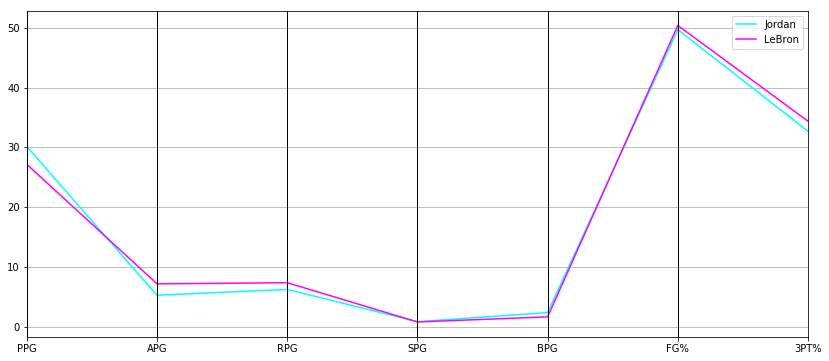

In [128]:
mpl.pyplot.figure(figsize=(14,6))

par = pd.plotting.parallel_coordinates(mean_df.iloc[:2], "Athletes", colormap=mpl.pyplot.cm.cool)


In [129]:
LeBron.tov.sum()/LeBron.shape[0]
Jordan.tov.sum()/Jordan.shape[0]


2.7276119402985075

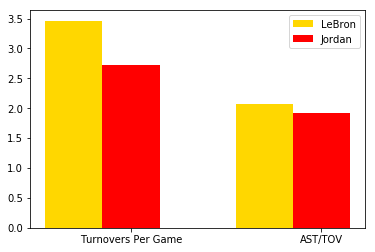

In [135]:
n_groups = 2
tov_LeBron = (LeBron.tov.sum()/LeBron.shape[0], mean_df.APG[1]/(LeBron.tov.sum()/LeBron.shape[0]))
tov_Jordan = (Jordan.tov.sum()/Jordan.shape[0], mean_df.APG[0]/(Jordan.tov.sum()/Jordan.shape[0]))

fig, ax = plt.subplots()
bar_width = 0.3
index = np.arange(n_groups)

plot1 = plt.bar(index, tov_LeBron,bar_width,
color='gold',
label='LeBron')

plot2 = plt.bar(index + bar_width, tov_Jordan,bar_width,
                color='red',
                label='Jordan')
plt.xticks(index + bar_width, ('Turnovers Per Game', 'AST/TOV'))
plt.legend()

plt.show()